# Power Analysis

The p-value is compared to the significance level, \alpha           (specified before the experiment, and its value depends on the kind of experiment and business requirements). Typical significance level measures are 0.10 or 10%, 0.05 or 5%, and 0.01 or 1%.

If p-value <= \alpha          : Reject the null hypothesis (significant result).
If p-value > \alpha          : Fail to reject the null hypothesis (not significant result).
All statistical hypothesis tests have a chance of making either of the following types of errors:

Type I Error: Incorrect rejection of a true null hypothesis or a false positive.
Type II Error: Incorrect acceptance of a false null hypothesis or a false negative.

### Example 1

In [2]:
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

In [3]:
#calculation of effect size
# size of samples in pilot study
n1, n2 = 4, 4

In [4]:
# variance of samples in pilot study
s1, s2 = 5**2, 5**2

In [5]:
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

In [6]:
# means of the samples
u1, u2 = 90, 85

In [7]:
# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')

Effect size: 1.0


In [9]:
# factors for power analysis
alpha = 0.05
power = 0.8

In [10]:

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 16.715


### Exemple 2

In [11]:
from statsmodels.stats.power import TTestPower

In [12]:
power = TTestPower()
n_test = power.solve_power(nobs=40, effect_size = 0.5,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.869


In [13]:

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

In [14]:
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))

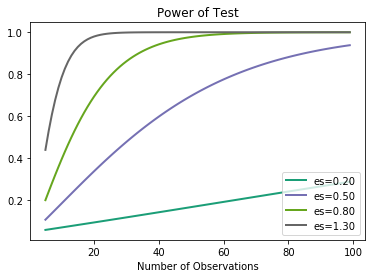

In [15]:
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()